<a href="https://colab.research.google.com/github/Nourjaweny/Some-machine-Learning-projects/blob/main/Sentiment_Analysis_Project_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:
!pip install beautifulsoup4

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

In [ ]:
data=pd.read_csv("/content/data.csv")

Visualization

In [ ]:
import plotly.express as px
fig = px.histogram(data, x='Sentiment', nbins=15)
fig.show()

#DATA PREPROCESSING

In [ ]:
data.shape

(5842, 2)

In [ ]:
data.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [ ]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
data['Sentiment'].value_counts() #exploring our Data

Sentiment
neutral     3130
positive    1852
negative     860
Name: count, dtype: int64

In [ ]:
ch=data['Sentence'][0]
ch
#trying the pre-processing on the first phrase

"The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model ."

In [ ]:
!pip install nltk

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('english'))
#I wanted to know all the stopwords in english that can i delete from the phrase

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import re
ch=re.sub('[^a-zA-Z]'," ",ch) # 9otlou kol matal9a haja f ch apar les lettres de a jusqu'a z et A jusqu'a Z 3awadhha b vide: ""
#en fait kifh re.sub('[a-zA-Z]'," ",ch) t3awedhlk les a-z et A-Z b vide ama ena nheb bl 3aks cad illi differants donc tzid ^
ch

'The GeoSolutions technology will leverage Benefon  s GPS solutions by providing Location Based Search Technology   a Communities Platform   location relevant multimedia content and a new and powerful commercial model  '

In [ ]:
ch=ch.lower() #because en majuscul ou miniscule pas de diff

In [ ]:
ch=ch.split(" ")
ch #i turn it to list to make the next step easier

['the',
 'geosolutions',
 'technology',
 'will',
 'leverage',
 'benefon',
 '',
 's',
 'gps',
 'solutions',
 'by',
 'providing',
 'location',
 'based',
 'search',
 'technology',
 '',
 '',
 'a',
 'communities',
 'platform',
 '',
 '',
 'location',
 'relevant',
 'multimedia',
 'content',
 'and',
 'a',
 'new',
 'and',
 'powerful',
 'commercial',
 'model',
 '',
 '']

In [ ]:
s=stopwords.words('english')
s #i just puted the stopwords on a lis

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
L=[]
for word in ch:
    if word not in s:
        L.append(word)
print(L) #i deleted them

['geosolutions', 'technology', 'leverage', 'benefon', '', 'gps', 'solutions', 'providing', 'location', 'based', 'search', 'technology', '', '', 'communities', 'platform', '', '', 'location', 'relevant', 'multimedia', 'content', 'new', 'powerful', 'commercial', 'model', '', '']


In [ ]:
ch=' '.join(L)
ch #return the chaine

'geosolutions technology leverage benefon  gps solutions providing location based search technology   communities platform   location relevant multimedia content new powerful commercial model  '

In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
ch=ps.stem(ch)
ch
#en fait "happy" or "happiest" or "happyer" famch far9 fl ma3na lkolhom yatiwk "happy" so portterStemer do that de façon tfasakh les suffix eli hachtich bihom
#lah9i9a mahabtch tmchili al phrase edhi ama kmlt ala amal tmchi m3a toute la data

'geosolutions technology leverage benefon  gps solutions providing location based search technology   communities platform   location relevant multimedia content new powerful commercial model  '

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
cv.fit_transform(ch.split()).toarray()
#jarebet l countvectorizer ala ch
#count vectorizer thawelek l chaine l des 0 et 1 puisque machine tekhdem bl 0 et 1

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0,

In [ ]:
#pre_processing al data lkol
L1=[]
for i in range (len(data)):
        ch=re.sub('[^a-zA-Z]',"",data['Sentence'][i])
        ch=ch.lower()
        ch=ch.split()
        ch=[word for word in ch if word not in stopwords.words('english')]
        ch=' '.join(ch)
        ch=ps.stem(ch)
        L1.append(ch)
L1

['thegeosolutionstechnologywillleveragebenefonsgpssolutionsbyprovidinglocationbasedsearchtechnologyacommunitiesplatformlocationrelevantmultimediacontentandanewandpowerfulcommercialmodel',
 'esionlowsdowntobkarealposs',
 'forthelastquarterofcomponentasnetsalesdoubledtoeurmfromeurmforthesameperiodayearearlierwhileitmovedtoazeropretaxprofitfromapretaxlossofeurm',
 'accordingtothefinnishrussianchamberofcommerceallthemajorconstructioncompaniesoffinlandareoperatinginrussia',
 'theswedishbuyoutfirmhassolditsremainingpercentstakealmosteighteenmonthsaftertakingthecompanypublicinfinland',
 'spywouldntbesurprisedtoseeagreenclos',
 'shellsbillionbgdealmeetsshareholderskeptic',
 'sshcommunicationssecuritycorpstockexchangereleaseoctoberatpmthecompanyupdatesitsfullyearoutlookandestimatesitsresultstoremainatlossforthefullyear',
 'konesnetsalesrosebysomeyearonyearinthefirstninemonthsof',
 'thestockmanndepartmentstorewillhaveatotalfloorspaceofoversquaremetresandstockmannsinvestmentintheprojectwillhaveap

In [ ]:
from nltk.tokenize import word_tokenize as tokenize

In [ ]:
cv=CountVectorizer(analyzer='word', tokenizer=tokenize, lowercase=True ,ngram_range=(1, 1),stop_words='english')

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
X=cv.fit_transform(L1).toarray()
X.shape

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



(5842, 5281)

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#BUILDING the Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score , classification_report
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

In [ ]:
Y=data['Sentiment']


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=20,random_state=1)

Using KNN model

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [ ]:
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    scores.append(round(accuracy_score(y_pred,y_test),2))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,30),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')

In [ ]:
knn=KNeighborsClassifier(n_neighbors=25) #ahsen k 25 qui donne 0.8 acccuracy mais dans la prediction pas de "negative"
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

TRYING ANOTHER MODEL: DecisionTree

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=20)

In [ ]:
treee = tree.DecisionTreeClassifier()
treee.fit(x_train, y_train)   #fitting our model

In [ ]:
y_pred=treee.predict(x_test)

Testing model’s performance

In [ ]:
print("score:{}".format(accuracy_score(y_test, y_pred)))

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True) #pas "de positive"

In [ ]:
print(classification_report(y_test,y_pred))

TRYING ANOTHER MODEL: LOGISTIC REGRESSIN


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=20)

In [ ]:
logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)

Testing model’s performance

In [ ]:
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [ ]:
print(classification_report(y_test,y_pred))

RANDOM_FOREST

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=20)

In [ ]:
clf=RandomForestClassifier()#par defauts n_estimators =10
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)

testing our model

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         6
     neutral       0.44      0.70      0.54        10
    positive       1.00      0.25      0.40         4

    accuracy                           0.40        20
   macro avg       0.48      0.32      0.31        20
weighted avg       0.42      0.40      0.35        20



<Axes: xlabel='Predicted', ylabel='Actual'>

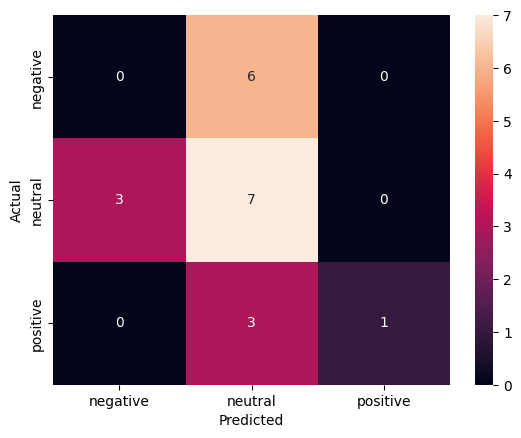

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True) #predicted just the neutral

In [ ]:
scores=cross_val_score(clf,X,Y,cv=3,error_score='raise')

In [ ]:
print(sum(scores)/5)

0.2895242931525255


Trying maltinumialNB

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=20)

In [ ]:
clf=MultinomialNB()

In [ ]:
clf.fit(x_train,y_train)

MultinomialNB()

In [ ]:
y_predicted=clf.predict(x_test)

Testing our model

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.45


<Axes: xlabel='Predicted', ylabel='Actual'>

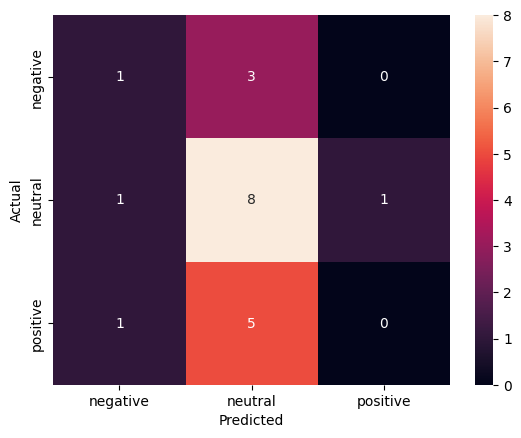

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.33      0.25      0.29         4
     neutral       0.50      0.80      0.62        10
    positive       0.00      0.00      0.00         6

    accuracy                           0.45        20
   macro avg       0.28      0.35      0.30        20
weighted avg       0.32      0.45      0.36        20



Conclusion, aucun model donne vraiment un bon resultat , on passe alors au deep learning